In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
 #loading the data 
plt.style.use("seaborn")
df = pd.read_csv(r"EOD-MSFT.csv")

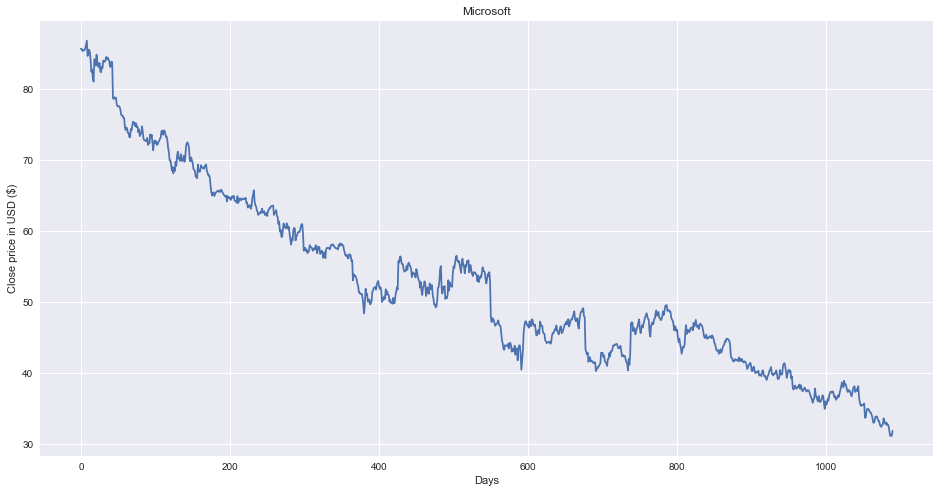

In [24]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Microsoft")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot(df['Close'])
plt.show()

In [3]:
print(df.head())

         Date   Open     High     Low  Close      Volume  Dividend  Split  \
0  2017-12-28  85.90  85.9300  85.550  85.72  10594344.0       0.0    1.0   
1  2017-12-27  85.65  85.9800  85.215  85.71  14678025.0       0.0    1.0   
2  2017-12-26  85.31  85.5346  85.030  85.40   9891237.0       0.0    1.0   
3  2017-12-22  85.40  85.6300  84.920  85.51  14145841.0       0.0    1.0   
4  2017-12-21  86.05  86.1000  85.400  85.50  17990745.0       0.0    1.0   

    Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  
0  82.828094  82.857021  82.490610  82.654531  10594344.0  
1  82.587034  82.905233  82.167590  82.644889  14678025.0  
2  82.259193  82.475761  81.989206  82.345975   9891237.0  
3  82.345975  82.567749  81.883140  82.452041  14145841.0  
4  82.972730  83.020942  82.345975  82.442398  17990745.0  


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,52.584746,52.995410,52.178964,52.617352,3.185689e+07,0.005303,1.0,48.442096,48.818849,48.069629,48.472015,3.185689e+07
std,12.834439,12.866606,12.784332,12.832792,1.709372e+07,0.042538,0.0,13.391309,13.432295,13.334148,13.390798,1.709372e+07
min,31.100000,31.390000,30.950000,31.152000,7.425603e+06,0.000000,1.0,26.856025,27.106451,26.726495,26.900929,7.425603e+06
25%,42.955000,43.265000,42.612500,43.058750,2.185425e+07,0.000000,1.0,38.373430,38.841038,37.997730,38.528480,2.185425e+07
50%,49.535000,50.105000,49.120000,49.690000,2.808245e+07,0.000000,1.0,45.676995,46.197534,45.202369,45.835212,2.808245e+07
75%,60.640000,61.130000,60.241250,60.637500,3.624615e+07,0.000000,1.0,57.015648,57.546566,56.797845,57.158471,3.624615e+07
max,87.120000,87.499900,86.230000,86.850000,2.025224e+08,0.420000,1.0,84.004465,84.370779,83.146293,83.744121,2.025224e+08


In [5]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [7]:
regressor =  LinearRegression()

In [8]:
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.coef_)

[ 7.79263644e-01  7.64750951e-01 -5.43385915e-01 -2.41208276e-10]


In [10]:
print(regressor.intercept_)

-0.0038372801385548883


In [11]:
predict = regressor.predict(x_test)

In [12]:
print(predict)

[53.54380344 63.5211234  45.59684708 60.88107536 52.29194401 72.73193472
 82.49011218 47.57821232 51.27728392 57.65014762 46.39799102 46.43444165
 62.35104979 37.29935424 32.67614519 47.71300023 74.8754844  53.91553662
 56.09650865 74.00483121 53.77062337 64.84985831 42.27900318 37.5096639
 51.18399283 62.46315384 42.2601254  49.73043114 57.32115778 34.28656763
 49.28927352 65.656334   35.91600474 46.16966076 42.53302716 45.67091519
 83.77057736 53.66840788 43.01964488 43.78456207 57.28177761 62.30358243
 41.22760682 43.40797422 56.39057791 46.19487217 32.20800663 48.97437516
 57.95876771 47.95112551 39.67407886 60.00093696 56.08564875 50.56792545
 56.54146656 36.93353242 46.5881603  42.45604282 75.48624557 51.14740205
 56.96238439 43.96099919 82.37210475 51.01687549 44.15904991 49.67931633
 44.50592277 40.3930612  54.7692175  38.29586    72.25279376 47.02471521
 55.63805591 43.37103057 41.15351012 84.29390067 85.62095909 33.388646
 46.0234509  61.17171991 57.88726696 55.21731762 42.62

In [13]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [14]:
dframe.head(25)

,Actual,Predicted
0,53.36,53.543803
1,63.34,63.521123
2,45.53,45.596847
3,60.63,60.881075
4,51.79,52.291944
5,72.83,72.731935
6,82.40,82.490112
7,47.87,47.578212
8,51.59,51.277284
9,57.80,57.650148


In [15]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.18188686626686934
Mean Squared Error :  0.06251216909815276
Root Mean Squared Error :  0.2500243370117252


In [16]:
graph = dframe.head(20)

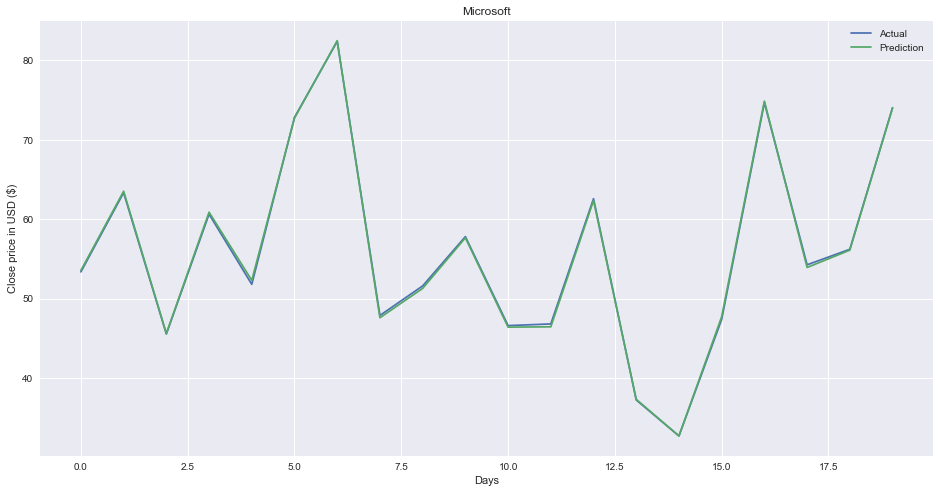

In [17]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Microsoft")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()

In [22]:
plt.savefig("Microsoft.png")

<Figure size 576x396 with 0 Axes>